# sprint1 機械学習フロー

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#import seaborn as sns
from sklearn import cross_validation

## データを読み込み、前処理

In [216]:
# データを読み込む
app_train = pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")

In [3]:
# 読み込んだデータの確認
display(app_train.head(3))
display(app_test.head(3))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [156]:
# trainデータを説明変数と目的変数にわける
X = app_train.loc[:, app_train.columns != "TARGET"]
y = app_train["TARGET"]
# 確認
display(X.head(3))
display(y.head(3))

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


0    1
1    0
2    0
Name: TARGET, dtype: int64

In [5]:
# 前処理
X_selected = X.select_dtypes(include=float).dropna(how="any", axis=1) #サンプル数は変わっていない
display(X_selected.shape)

(307511, 4)

In [6]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_selected)
X_selected_transformed = scaler.transform(X_selected)
display(X_selected_transformed)

array([[ 0.14212925, -0.47809496, -0.14945221,  0.37983698],
       [ 0.42679193,  1.7254498 , -1.25275029,  1.07869689],
       [-0.4271961 , -1.15288792, -0.78345096,  0.20611551],
       ...,
       [-0.06662338,  0.19537871, -1.14711999, -0.49700228],
       [ 0.00928667, -0.56875681, -1.12463468,  0.68810743],
       [-0.04764587,  0.18875991,  1.83294163, -0.04027377]])

## モデルと評価指標

In [30]:
# 2値分類の評価指標を計算
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def evaluate(y_true, y_pred, y_pred_proba):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    confusion = metrics.confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba[:, 1])
    return acc, precision, recall, f1, confusion, auc

In [31]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

def pred_random_forest(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier()
    model = random_forest
    model_name = "Random Forest"
    print(model_name)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}\nauc \n {}".format(*evaluate(y_test, y_pred, y_pred_proba)))

## 【問題1】クロスバリデーション

In [32]:
# KFoldクラスによるクロスバリデーション
from sklearn.model_selection import KFold

n_splits = 4
"""
n_splits = k の値をどれくらいにするか。
k = 1 : データが十分に多い場合は、Hold-Out法を用いる。
k = 5,10
k = n : データが少ない場合は、kの値はnに固定される。nはデータセットのサイズ。
"""

def kfold_cross_validation(X, y, n_splits=n_splits):
    """
    KFoldクラスによるクロスバリデーションを行う関数
    """
    kf = KFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pred_random_forest(X_train, X_test, y_train, y_test)
        print()

In [33]:
kfold_cross_validation(X_selected_transformed, y)

KFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76878  76879  76880 ... 307508 307509 307510] TEST: [    0     1     2 ... 76875 76876 76877]
Random Forest
acc : 0.9157496292827597
precision : 0.12158808933002481
recall : 0.007939079714841219
f1 : 0.01490494296577947
confusion matrix 
 [[70352   354]
 [ 6123    49]]
auc 
 0.533949671592018

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76878  76879  76880 ... 153753 153754 153755]
Random Forest
acc : 0.9133302115039413
precision : 0.1325
recall : 0.008321557544355472
f1 : 0.015659624759934997
confusion matrix 
 [[70162   347]
 [ 6316    53]]
auc 
 0.5330781320611966

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [153756 153757 153758 ... 230631 230632 230633]
Random Forest
acc : 0.9155545149457582
precision : 0.11954022988505747
recall : 0.008440188281123194
f1 : 0.015767131594906003
confusion matrix 
 [[70334   383]
 [ 6109    52]]
auc 
 0.5274923545706919

TRAIN: [     0      1      2 ...

## 【問題2】グリッドサーチ

In [11]:
# グリッドサーチ
from sklearn.model_selection import GridSearchCV
# roc_aucで最適化した
parameters = {'n_estimators':[10, 20, 30], 'max_depth':[5, 10]}
random_forest = RandomForestClassifier()
clf_r_f = GridSearchCV(random_forest, parameters, cv=4, scoring="roc_auc")
clf_r_f.fit(X_selected_transformed, y)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [53]:
# 最適化されたモデルを取得
random_forest_best = clf_r_f.best_estimator_
# そのパラメータを取得
random_forest_best_params = clf_r_f.best_params_
print(random_forest_best_params)
# そのスコアを確認
random_forest_best_score = clf_r_f.best_score_
print("best_score =", random_forest_best_score)

{'max_depth': 10, 'n_estimators': 30}
best_score = 0.593377425138086


### 最適化したモデルでスコアを出してみる

[0.00000000e+00 0.00000000e+00 1.41468728e-05 ... 9.99929266e-01
 9.99957559e-01 1.00000000e+00]
[1.61524794e-04 6.62251656e-03 6.62251656e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0.74005691 0.25336096 0.25076935 ... 0.00369092 0.00342637 0.00263082]


0.6757165902374873

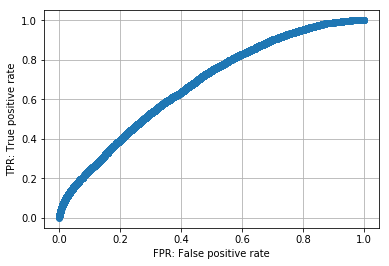

In [54]:
# 一例としてROC曲線を表示
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_selected_transformed, y, test_size=0.25, random_state=42)
y_pred = random_forest_best.predict_proba(X_test)
roc = roc_curve(y_test, y_pred[:, 1])
fpr, tpr, thresholds = roc

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print(fpr)
print(tpr)
print(thresholds)

roc_auc_score(y_test, y_pred[:, 1])

### 提出用のデータで予測をする

In [55]:
# 提出用
app_test_selected = app_test.loc[:, X_selected.columns]
app_test_selected_transformed = scaler.transform(app_test_selected)
app_test_pred = random_forest_best.predict_proba(app_test_selected_transformed)[:, 1]
app_test_pred

array([0.11336917, 0.08476774, 0.10056951, ..., 0.10297819, 0.11138803,
       0.11449047])

In [56]:
# テスト値を再読み込みして，RandomForestでクラス分類したカラムを追加
df_out = pd.read_csv("application_test.csv")
df_out["TARGET"] = app_test_pred

# outputディレクトリに出力する
df_out[["SK_ID_CURR","TARGET"]].to_csv("submission.csv",index=False)

## 【問題3】Kernelからの調査

### どんな人、どんなやり方があるか

#### ランダムフォレストの引数を変えていた例

## 【問題4】高い汎化性能のモデル作成

### StratifiedKFoldクラスによるクロスバリデーション

In [41]:
# StratifiedKFoldクラスによるクロスバリデーション
from sklearn.model_selection import StratifiedKFold

n_splits = 4
def stratified_kfold_cross_validation(X, y, n_splits=n_splits):
    """
    StratifiedKFoldクラスによるクロスバリデーションを行う関数
    """
    kf = StratifiedKFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pred_random_forest(X_train, X_test, y_train, y_test)
        print()

In [42]:
stratified_kfold_cross_validation(X_selected_transformed, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76839  76840  76841 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.9146841139973204
precision : 0.10714285714285714
recall : 0.007733204446592557
f1 : 0.014425244177310292
confusion matrix 
 [[70272   400]
 [ 6159    48]]
auc 
 0.5387640181564856

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76839  76840  76841 ... 153895 153896 153897]
Random Forest
acc : 0.9148781185774864
precision : 0.1141552511415525
recall : 0.008056719303899453
f1 : 0.015051173991571343
confusion matrix 
 [[70284   388]
 [ 6156    50]]
auc 
 0.5322897981048524

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.914655878871444
precision : 0.11159737417943107
recall : 0.00821785368997744
f1 : 0.015308419630796936
confusion matrix 
 [[70265   406]
 [ 6155    51]]
auc 
 0.5230731018128317

TRAIN: [  

### ランダムフォレストの引数を変えてみる

In [46]:
def pred_random_forest_1(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
    model = random_forest
    model_name = "Random Forest"
    print(model_name)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}\nauc \n {}".format(*evaluate(y_test, y_pred, y_pred_proba)))

In [47]:
n_splits = 4
def stratified_kfold_cross_validation_1(X, y, n_splits=n_splits):
    """
    StratifiedKFoldクラスによるクロスバリデーションを行う関数
    """
    kf = StratifiedKFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pred_random_forest_1(X_train, X_test, y_train, y_test)
        print()

In [48]:
stratified_kfold_cross_validation_1(X_selected_transformed, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76839  76840  76841 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.5148089855487195
precision : 0.09973739766232428
recall : 0.6241340422104076
f1 : 0.17199049923416723
confusion matrix 
 [[35704 34968]
 [ 2333  3874]]
auc 
 0.5946198434771641

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76839  76840  76841 ... 153895 153896 153897]
Random Forest
acc : 0.5162595280834569
precision : 0.09940265315093998
recall : 0.6194005800837898
f1 : 0.17131269915546937
confusion matrix 
 [[35845 34827]
 [ 2362  3844]]
auc 
 0.5899373541281447

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.5035706388126487
precision : 0.09837631327602674
recall : 0.6306799871092491
f1 : 0.1702035136545486
confusion matrix 
 [[34799 35872]
 [ 2292  3914]]
auc 
 0.5900367994538865

TRAIN: [     0   

#### さらにグリッドサーチしてみる

In [50]:
# roc_aucで最適化した
parameters = {'min_samples_leaf':[1, 2, 5], 'max_features':["auto", "log2", "sqrt"]}
random_forest_1 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
clf_1_r_f = GridSearchCV(random_forest_1, parameters, cv=4, scoring="roc_auc")
clf_1_r_f.fit(X_selected_transformed, y)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 2, 5], 'max_features': ['auto', 'log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [52]:
# 最適化されたモデルを取得
random_forest_best_1 = clf_1_r_f.best_estimator_
# そのパラメータを取得
random_forest_best_params_1 = clf_1_r_f.best_params_
print(random_forest_best_params_1)
# そのスコアを確認
random_forest_best_score_1 = clf_1_r_f.best_score_
print("best_score =", random_forest_best_score_1)

{'max_features': 'auto', 'min_samples_leaf': 5}
best_score = 0.5908178834733453


#### 提出してみる。

In [57]:
# 提出用
app_test_selected = app_test.loc[:, X_selected.columns]
app_test_selected_transformed = scaler.transform(app_test_selected)
app_test_pred_1 = random_forest_best_1.predict_proba(app_test_selected_transformed)[:, 1]
app_test_pred_1

array([0.57557973, 0.39124833, 0.56730113, ..., 0.56000945, 0.5725557 ,
       0.5792076 ])

In [58]:
# テスト値を再読み込みして，RandomForestでクラス分類したカラムを追加
df_out = pd.read_csv("application_test.csv")
df_out["TARGET"] = app_test_pred_1

# outputディレクトリに出力する
df_out[["SK_ID_CURR","TARGET"]].to_csv("submission_1.csv",index=False)

In [69]:
print("app_test_pred")
display(pd.DataFrame(app_test_pred).describe().transpose())
print("app_test_pred_1")
display(pd.DataFrame(app_test_pred_1).describe().transpose())

app_test_pred


,count,mean,std,min,25%,50%,75%,max
0,48744.0,0.081814,0.02546,0.004549,0.064244,0.081986,0.10088,0.352378


app_test_pred_1


,count,mean,std,min,25%,50%,75%,max
0,48744.0,0.493175,0.071961,0.153724,0.452686,0.509296,0.551574,0.606369


### 特徴量が全てある状態でランダムフォレストで予測

In [170]:
n_splits = 4
def stratified_kfold_cross_validation_2(X, y, n_splits=n_splits):
    """
    StratifiedKFoldクラスによるクロスバリデーションを行う関数
    """
    kf = StratifiedKFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pred_random_forest_1(X_train, X_test, y_train, y_test)
        print()

In [220]:
X_1 = X.copy()

X_1_object_columns = X_1.select_dtypes(include="object").columns
X_1[X_1_object_columns] = X_1[X_1_object_columns].fillna("NaN")
X_1 = X_1.fillna(X_1.median())

In [221]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

for column in X_1_object_columns:
    print(column)
    #ラベルを覚えさせる
    le = le.fit(X_1[column])
    #ラベルを整数に変換
    X_1[column] = le.transform(X_1[column])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [222]:
random_forest_2 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
random_forest_2.fit(X_1, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [223]:
stratified_kfold_cross_validation_2(X_1, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76839  76840  76841 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.6661376969003239
precision : 0.14934409687184663
recall : 0.6676333172224908
f1 : 0.24408776321602124
confusion matrix 
 [[47068 23604]
 [ 2063  4144]]
auc 
 0.7235340473679198

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76839  76840  76841 ... 153895 153896 153897]
Random Forest
acc : 0.6699966180181587
precision : 0.15075083831462313
recall : 0.6664518208185627
f1 : 0.2458831222876167
confusion matrix 
 [[47372 23300]
 [ 2070  4136]]
auc 
 0.7268865671470005

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.6728670473613695
precision : 0.15009789796446119
recall : 0.6546890106348695
f1 : 0.24420736288504882
confusion matrix 
 [[47665 23006]
 [ 2143  4063]]
auc 
 0.7203933082171542

TRAIN: [     0   

### 特徴量が全てある状態でランダムフォレスト（改良版１）

#### 前処理

In [233]:
X_1 = X.copy()
app_test_1 = app_test.copy()
Xs = pd.concat([X_1, app_test_1])

Xs_object_columns = Xs.select_dtypes(include="object").columns
Xs[Xs_object_columns] = Xs[Xs_object_columns].fillna("NaN")
Xs = Xs.fillna(Xs.median())

In [234]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

for column in Xs_object_columns:
    print(column)
    #ラベルを覚えさせる
    le = le.fit(Xs[column])
    #ラベルを整数に変換
    Xs[column] = le.transform(Xs[column])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [ ]:
X_1 = Xs[:len(X_1)]
app_test_1 = Xs[len(X_1):]

#### 学習

In [235]:
random_forest_2 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
random_forest_2.fit(X_1, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

#### 予測

In [236]:
stratified_kfold_cross_validation_2(X_1, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76839  76840  76841 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.666319801246114
precision : 0.14936891453299675
recall : 0.6673111003705494
f1 : 0.24409936057989803
confusion matrix 
 [[47084 23588]
 [ 2065  4142]]
auc 
 0.7236153812260502

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76839  76840  76841 ... 153895 153896 153897]
Random Forest
acc : 0.6707770753661646
precision : 0.15100474972597736
recall : 0.6659684176603287
f1 : 0.24618775315701694
confusion matrix 
 [[47435 23237]
 [ 2073  4133]]
auc 
 0.7269170511681387

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.6714622058613109
precision : 0.14963033802920514
recall : 0.6554946825652594
f1 : 0.2436438774593478
confusion matrix 
 [[47552 23119]
 [ 2138  4068]]
auc 
 0.7201763020086364

TRAIN: [     0    

#### 予測（提出用）

In [237]:
app_test_pred_2 = random_forest_2.predict_proba(app_test_1)[:, 1]
app_test_pred_2

array([0.45610626, 0.54461963, 0.39185225, ..., 0.39642583, 0.44321371,
       0.59522521])

In [238]:
# テスト値を再読み込みして，RandomForestでクラス分類したカラムを追加
df_out = pd.read_csv("application_test.csv")
df_out["TARGET"] = app_test_pred_2

# outputディレクトリに出力する
df_out[["SK_ID_CURR","TARGET"]].to_csv("submission_2.csv",index=False)

## 【問題5】最終的なモデルの選定